In [4]:
import pandas as pd
dataset = pd.read_csv("diabetes.csv")
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
Features = dataset.drop('Outcome', axis=1)
Labels = dataset['Outcome']
#scale x
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Features)

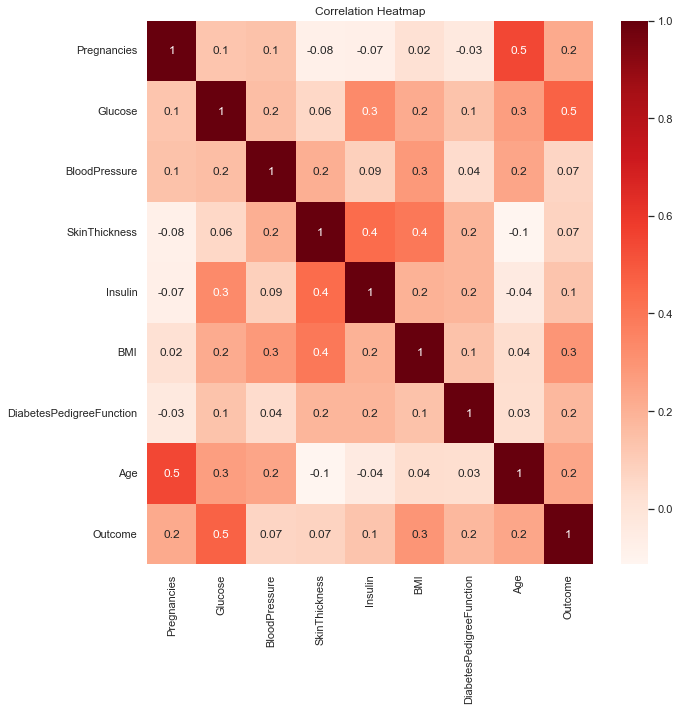

In [17]:
#plotting features to see the correlation between them and the labels
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap= plt.cm.Reds, fmt='.1g').figure.set_size_inches(10,10)
plt.title('Correlation Heatmap')
plt.show()




In [19]:
from sklearn.model_selection import train_test_split
#Training & testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Labels, train_size = 0.8, random_state=10)
#validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.5, random_state=10)

In [27]:
#Train using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
#evaluate training
y_pred = dt.predict(X_train)
print("Training accuracy: ", accuracy_score(y_train, y_pred))
#evaluate validation
y_pred = dt.predict(X_val)
print("Validation accuracy: ", accuracy_score(y_val, y_pred))
#evaluate testing
y_pred = dt.predict(X_test)
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

Training accuracy:  1.0
Validation accuracy:  0.749185667752443
Testing accuracy:  0.6558441558441559


In [36]:
#Train using bagging
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier()) #use default parameters
bagging.fit(X_train, y_train)
#evaluate training
y_pred = bagging.predict(X_train)
print("Training accuracy: ", accuracy_score(y_train, y_pred))
#evaluate validation
y_pred = bagging.predict(X_val)
print("Validation accuracy: ", accuracy_score(y_val, y_pred))
#evaluate testing
y_pred = bagging.predict(X_test)
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

Training accuracy:  0.9837133550488599
Validation accuracy:  0.7719869706840391
Testing accuracy:  0.7207792207792207


In [37]:
#Cross validation for bagging
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bagging, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)

Cross validation scores:  [0.72580645 0.72580645 0.70491803 0.63934426 0.72131148]


In [38]:
#define a function to get relevant CV sesults
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means,stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std*2,3), params))

#use gridsearch to find the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {'max_samples':[0.5, 0.7, 1.0], #max samples to train each base estimator
'max_features':[0.5, 0.7, 1.0], #max features to train each base estimator
'n_estimators':[10, 20, 30] #number of base estimators
}

#now just call the gridsearchCV method
cv = GridSearchCV(bagging, parameters, cv = 5)
cv.fit(X_train, y_train)
#print all the parameter sets
print("All parameter sets:")
print_results(cv)

All parameter sets:
BEST PARAMS: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 30}

0.733 (+/-0.096) for {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10}
0.726 (+/-0.121) for {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 20}
0.723 (+/-0.073) for {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 30}
0.707 (+/-0.062) for {'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 10}
0.749 (+/-0.177) for {'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 20}
0.73 (+/-0.079) for {'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 30}
0.723 (+/-0.112) for {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 10}
0.713 (+/-0.091) for {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 20}
0.684 (+/-0.052) for {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 30}
0.693 (+/-0.1) for {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 10}
0.749 (+/-0.168) for {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators'

In [39]:
#fit bagging model using best parameters
bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=0.5, n_estimators=30)
bagging.fit(X_train, y_train)
#evaluate training
y_pred = bagging.predict(X_train)
print("Training accuracy: ", accuracy_score(y_train, y_pred))
#evaluate validation
y_pred = bagging.predict(X_val)
print("Validation accuracy: ", accuracy_score(y_val, y_pred))
#evaluate testing
y_pred = bagging.predict(X_test)
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

Training accuracy:  1.0
Validation accuracy:  0.7328990228013029
Testing accuracy:  0.7467532467532467
